In [2]:
from IPython.display import Image

# --------------------------------------------------------------------------------

# 카카오 로그인 연동

# --------------------------------------------------------------------------------

참고 사이트 :

https://github.com/react-native-seoul/react-native-kakao-login

https://medium.com/@zeroweb.tech/react-native-앱에-카카오링크-적용하기-d170d31b780b

## 카카오 개발자 앱 등록

https://developers.kakao.com/docs/latest/ko/getting-started/app 의 가이드를 참고하여 카카오개발자 앱 생성완료하기

중간에 앱 플랫폼 등록시 해쉬키 등록 과정이 있는데, 해쉬 키를 얻기 위해서는 명령 프롬프트 창에 아래 코드 입력하기:

키 있는지 확인해봄 :

keytool -exportcert -alias androiddebugkey -keystore [프로젝트폴더경로]\android\app\debug.keystore -storepass android -keypass android  

In [6]:
# (예시) 내가 사용한 코드:

keytool -exportcert -alias androiddebugkey -keystore C:\Users\HK\ProjectApp\android\app\debug.keystore -storepass android -keypass android  

아래와 같은 결과가 출력된다.

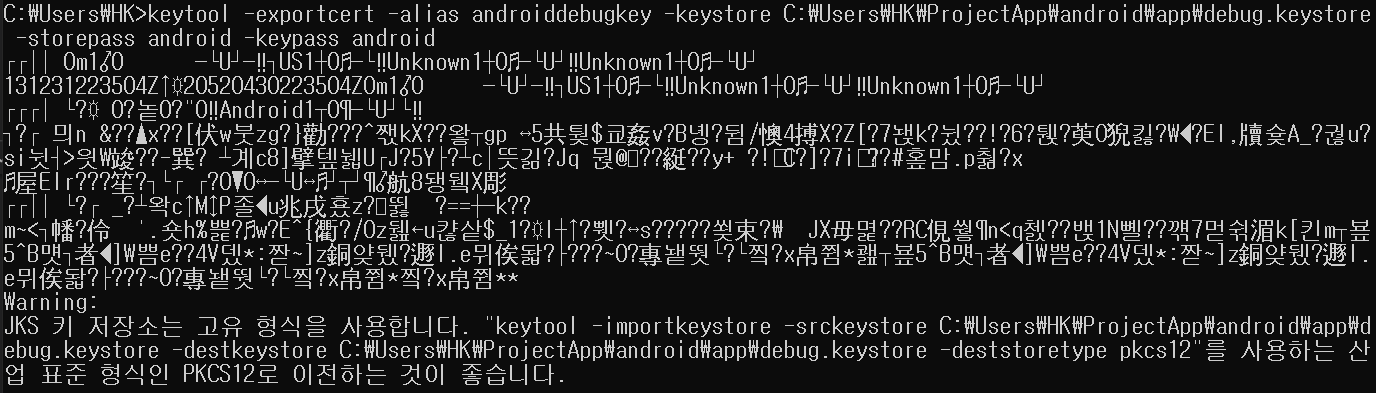

In [4]:
Image("/Users/kimhyunkyung/Downloads/키 해쉬값 존재확인.png")

그 다음으로는 해쉬 키를 추출하자. 다음의 코드를 입력 :

keytool -exportcert -alias androiddebugkey -keystore C:\Users\HK\ProjectApp\android\app\debug.keystore -storepass android -keypass android | openssl sha1 -binary | openssl base64  

#### 해쉬 키 얻는 과정에서 에러 - "openssl 은 내부 또는 외부명령 , 실행할수 있는 프로그램 또는 배치파일이 아닙니다"

openssl을 설치해야 함. https://blog.naver.com/PostView.nhn?blogId=baekmg1988&logNo=221454486746 를 참고하여 openssl 설치.

 설치 후 사용자권한 명령 프롬프트에 아래의 코드 다시 입력 :

keytool -exportcert -alias androiddebugkey -keystore c:\users\사용자이름\.android\debug.keystore -storepass android -keypass android | openssl sha1 -binary | openssl base64

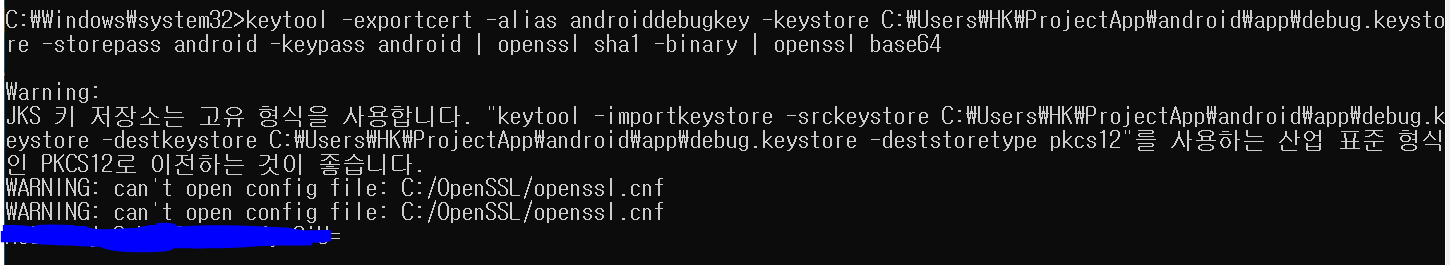

In [7]:
Image("/Users/kimhyunkyung/Downloads/키값 출력.png")

위와 같이 해쉬 키값이 나오는 것을 볼 수 있음.

전반적인 해쉬 키 추출 과정은 https://devtalk.kakao.com/t/topic/15280/4 링크 참고했음.

## 시작

< 리액트네이티브 버전 : RN >= 0.60 인 경우 >

프로젝트 내에서 아래 import 코드 실행 :

npm install @react-native-seoul/kakao-login

아래 포스팅 대로 따라하기:

http://blog.naver.com/PostView.nhn?blogId=hobin1019&logNo=221691709479&redirect=Dlog&widgetTypeCall=true&directAccess=false

2. subprojects{} 를 추가하여 그 안에 넣어주는 것을 명심해야 함. 기존에 있는 allproject{}에 추가하라는 포스팅들도 많았는데 나는 subproject{}를 추가하여 그 안에 넣었더니 잘 돌아감.

3. 네이티브 앱 키는 카카오앱 개발자 페이지에서 앱을 생성하면 얻게되는 키를 얘기하는 것. (내 어플리케이션 > 앱 키 에서 확인 가능)

4. 밑에 코드처럼 하라는 얘기

<application
  android:name=".MainApplication"
  android:label="@string/app_name"
  android:icon="@mipmap/ic_launcher"
  android:roundIcon="@mipmap/ic_launcher_round"
  android:allowBackup="true"
  android:theme="@style/AppTheme">
     
  <! --  com.kakao.sdk.AppKey 이름으로 앱키를 등록 -->
  <meta-data
    android:name="com.kakao.sdk.AppKey"
    android:value="@string/kakao_app_key" />

  <activity
      …

5. KAKAO_SDK_VERSION = 1.25.0 으로 했음. 1.29.0이 최신버전이어서 했더니 에러났음.

7번까지 완료하고 react-native run-android 돌렸더니 build successful. 하지만 에뮬레이터에서는 "Unable to load script. Make sure you're either running a Metro server or that your bundle 'index.android.bundle' is packaged correctly for release." 라는 에러 뜸. 이 에러는 https://dlevelb.tistory.com/1142 참고. 나는 assets 폴더가 있었기 때문에 프로젝트 폴더 경로에서 아래의 코드만 실행했음 :

react-native bundle --platform android --dev false --entry-file index.js --bundle-output android/app/src/main/assets/index.android.bundle --assets-dest android/app/src/main/res

이 후로는 앞의 에러가 뜨진 않았지만, 에뮬레이터 실행시 "emulator: ERROR: AdbHostServer.cpp:102: Unable to connect to adb daemon on port: 5037" 라는 에러 뜸. 아래의 코드 입력함 :

adb start-server 

그 후에 emulator -avd [에뮬레이터 이름] 실행하면 잘 돌아감.

## 카카오 로그인 적용예시

코드를 적용할 화면.js 파일에 아래 import 코드 추가 :

import KakaoLogins from '@react-native-seoul/kakao-login';

그 후, render() 안에 카카오 로그인 적용은 이런식으로 할 수 있음.

<Button
    onPress={() => KakaoLogins.login((err, result) => {
        if(err) {
            Alert.alert('error', err);
            return;
            }
            Alert.alert('result', result);
            })}
            title="kakaoLogin">
</Button>

(ex) 나는 이런식으로 사용했음 :

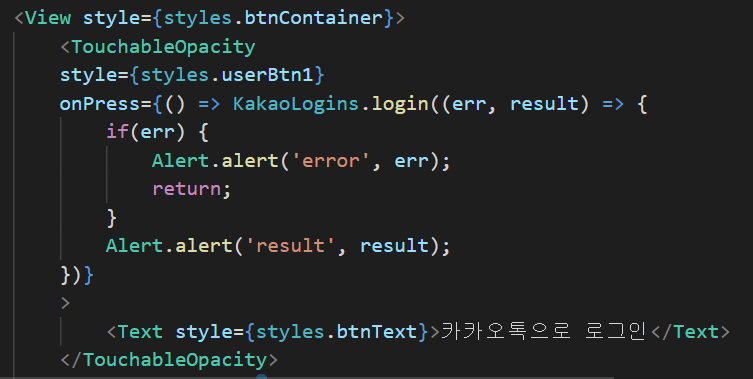

In [8]:
Image("/Users/kimhyunkyung/Downloads/카카오적용.png")

### 에러 참고

카카오 로그인 적용 성공 후에 한번 더 시도 했더니 value for message cannot be cast from readablenativemap to string 라는 에러 메세지 뜸.

https://github.com/react-native-seoul/react-native-kakao-login/issues/47 이 사이트를 보니 Alert.alert 말고 console.log를 사용했더니 정상작동 했다고 했음. 위의 나의 활용 예시에서 Alert.alert를 console.log로 바꿨지만 에러는 없어져도 기능이 반응 안함.

따라서 다른 사이트를 참고해봄.

이 사이트 참고 : https://developer.aliyun.com/mirror/npm/package/react-native-kakao-login-rn0.41

이 사이트에서는 KakaoLogin을 사용하지만 나는 카카오로그인 모듈을 가져올때 import KakaoLogins from '@react-native-seoul/kakao-login'을 사용했기 때문에 참고 코드에 있는 KakaoLogin들을 모두 KakaoLogins로 고쳐서 사용함.

# --------------------------------------------------------------------------------

# 네이버 로그인 연동

# --------------------------------------------------------------------------------

참고 사이트 : 

https://github.com/react-native-seoul/react-native-naver-login

https://www.seongmin.org/blog/react/react-native-naver-login

## 네이버 개발자 앱 등록

https://developers.naver.com/main/ 에 들어가서 -> 네이버 아이디로 로그인 -> 오픈 API 이용 신청

애플리케이션 이름 입력 후, 사용 API 부분에서 네아로(네이버아이디로로그인) 선택

환경은 안드로이드 선택

다운로드 URL은 차후 변경 가능하기 때문에 아무거나 입력해도 됨. 아직 런칭하기도 전인데 입력해야지만 다음으로 넘어갈 수 있어서 나는 내 블로그 주소 입력함.

안드로이드 앱 패키지 이름 입력 (ex) com.projectapp

## 시작

< 리액트네이티브 버전 : RN >= 0.60 인 경우 >

아래 코드 import 해주기 :

$ react-native link @react-native-seoul/naver-login

android/app/src/main/java/[...]/MainActivity.java 파일 열어서 아래 코드 추가하기 : (##############??????일단 이거 안함)

import com.dooboolab.naverlogin.RNNaverLoginPackage;

android/app/src/main/java/[...]/MainApplication.java 파일도 열어서 아래 코드 추가 : 

import com.dooboolab.naverlogin.RNNaverLoginPackage;

( RN >= 0.60 이면 이 과정 안해도 됨. RN < 0.60 인 경우만 해당 ) android/app/src/main/java/[...]/MainApplication.java 파일의 getPackages() 메서드에 추가 :

new RNNaverLoginPackage()

android/settings.gradle 파일 열어서 아래 코드 추가 :

include ':react-native-seoul-naver-login'
project(':react-native-seoul-naver-login').projectDir = new File(rootProject.projectDir, 	'../node_modules/@react-native-seoul/naver-login/android')

android/app/build.gradle 파일 안에 있는 dependencies에 추가 :

implementation project(':react-native-seoul-naver-login')

android/app/src/main/AndroidManifext.xml 파일의 <application> 태그 안에 아래 코드 추가 :

<application
...
<meta-data android:name="com.naver.sdk.ClientId" android:value="YOUR_KEY"/> 
<meta-data android:name="com.naver.sdk.ClientSecret" android:value="YOUR_KEY" /> 
</application>

#### 빌드가 잘 되는지 확인하기 위해 react-native run-android 해보니 에러 뜸 :  ( RN >= 0.60 인데 getPackages() 메서드에 new RNNaverLoginPackage() 추가 해서 그럼)

에러 내용 :

"Native module RNNaverLogin tried to override RNNaverLoginModule. Check the getPackages() method in MainApplication.java, it might be that module is being created twice. If this was your intention, set canOverrideExistingModule=true. This error my also be present if the package is present oly once in getPackages() but is also automatically added later during build time by autolinking. Try removing the existing entry and rebuild."

RN >= 0.60 버전을 사용하면 자동적으로 auto-linking을 해주어 getPackages()에 코드 추가 안해도 된다고 함. 따라서 getPackages()에 넣었던
packages.add(new RNNaverLoginPackage()); 코드를 지우고 다시 빌드하면 성공적으로 돌아감.

## 네이버 로그인 적용예시

https://github.com/react-native-seoul/react-native-naver-login

https://velog.io/@leeeeunz/Project-02-3.-로그인-페이지

# --------------------------------------------------------------------------------


# 구글 로그인 연동

# --------------------------------------------------------------------------------

참고 사이트 : 

https://www.youtube.com/watch?v=A1Ai4sKk0jM

https://github.com/react-native-community/google-signin

## firebase 시작하기

npm install --save react-native-firebase

firebase 처음 설정 및 연결은 이 영상 따라하기 : https://www.youtube.com/watch?v=tYJCeL5MrAc

구글 로그인 연동 with firebase 는 이 영상 따라하기 : https://www.youtube.com/watch?v=A1Ai4sKk0jM

1. firebase에 프로젝트 생성

2. 앱에 firebase를 추가하여 시작하기에서 안드로이드 선택 후 적용. 안드로이드 패키지 이름 입력해야 함. (ex) com.projectapp

- SHA1 키 가져오는 방법 : https://stackoverflow.com/questions/15727912/sha-1-fingerprint-of-keystore-certificate 참고

### SHA1 키 가져오기

vscode 상 프로젝트 폴더 터미널에서 아래 코드 입력하여 경로 변경 :

cd android\app

그 후 아래 코드 입력 :

keytool -list -v -keystore debug.keystore -alias androiddebugkey -storepass android -keypass android 

SHA1 값 나오는 것을 확인할 수 있음.

3. SHA1키 값 입력 후 google-services.json 파일 다운로드 후 프로젝트폴더/app 경로에 복사해줌.

4. firebase에서 하라는대로 add firebase sdk 과정 모두 수행 후 앱 돌려보기.

#### 앱을 돌려보려고 하니 에러 뜸 : "Task: react-native-community_masked-view:compileDebugJavaWithJavac FAILED"

해결 방법: 그냥 계속 react-native run-android 수차례 시도하면 정상적으로 돌아감.

이렇게 firebase 프로젝트 생성을 성공함.

## 시작

< 리액트네이티브 버전 : RN >= 0.60 인 경우 >

npm install --save @react-native-community/google-signin

이 후로부터는 https://www.youtube.com/watch?v=A1Ai4sKk0jM 에서 9분 36초 부분부터 보면서 차례대로 따라하면 됨.

(영상에서는 react-native run-android 할 때 명령어에 npx를 붙이던데 npx 안붙이고 react-native run-android 실행해도 됨. 나는 여태 react-native run-android 로만 실행했기 때문에 npx 안붙였음.)

1. android/build.gradle 파일의 ext{} 안에 아래 코드 추가 :

googlePlayServicesAuthVersion = "16.0.1"

## 구글 로그인 적용예시

https://www.youtube.com/watch?v=A1Ai4sKk0jM 후반부 보면 됨.

### 에러 참고

react-native run-android 실행시 Debug Error DebugGoogleServive 어쩌구 나와도 당황하지 말고 그냥 계속 창 닫고 다시 켜서 계속 시도하면 정상적으로 돌아감.